In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [109]:
df = pd.read_csv('114_congress.csv')

In [110]:
df.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [111]:
df.shape

(100, 18)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    100 non-null    object 
 1   party   100 non-null    object 
 2   state   100 non-null    object 
 3   00001   100 non-null    float64
 4   00004   100 non-null    float64
 5   00005   100 non-null    float64
 6   00006   100 non-null    float64
 7   00007   100 non-null    float64
 8   00008   100 non-null    float64
 9   00009   100 non-null    float64
 10  00010   100 non-null    float64
 11  00020   100 non-null    float64
 12  00026   100 non-null    float64
 13  00032   100 non-null    float64
 14  00038   100 non-null    float64
 15  00039   100 non-null    float64
 16  00044   100 non-null    float64
 17  00047   100 non-null    float64
dtypes: float64(15), object(3)
memory usage: 14.2+ KB


In [113]:
df.describe()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
count,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.325000,0.575000,0.535000,0.94500,0.54500,0.415000,0.54500,0.985000,0.525000,0.545000,0.410000,0.480000,0.510000,0.460000,0.370000
std,0.462618,0.494286,0.498761,0.22355,0.49795,0.492648,0.49795,0.111351,0.494286,0.487702,0.489176,0.497062,0.497367,0.495841,0.480004
min,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.00000,1.00000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
df.party.value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

**Hopkins Statistic**

In [115]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [116]:
df2 = df.drop(['name', 'party', 'state'], axis=1)

In [117]:
df2.shape

(100, 15)

In [118]:
hopkins(df2, df2.shape[0]) 

0.16980517450003785

H is close to zero, which means that the dataset contains meaningful clusters.

In [119]:
hopkins(scale(df2), df2.shape[0])  

0.13788326303501783

Scaling caused an improvement in the Hopkins statistic.

**K-Means Clustering - not scaled**

In [120]:
k_means = KMeans(n_clusters = 2).fit(df2)

In [121]:
clusters = k_means.labels_

In [122]:
tab = pd.crosstab(clusters, df["party"])
tab

party,D,I,R
row_0,,,
0,3,0,54
1,41,2,0


In [123]:
df.party.value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

Considering the confusion matrix above, it looks like K-Means correctly clustered all the Republicans (they voted according to the Party decisions), but missed 3 Democrat senators.I can check all the row, or write a little code.

In [129]:
df['predicted_clusters'] = clusters

In [130]:
df.sample(5)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,predicted_clusters
51,Kirk,R,IL,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0
20,Collins,R,ME,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
9,Boxer,D,CA,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
86,Shelby,R,AL,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [131]:
D_miss = df[(clusters == 0) & (df["party"] == "D")] # 0 is used as a mistake in the Confusion Matrix for Democrats.

In [132]:
D_miss['name']

42    Heitkamp
56     Manchin
74        Reid
Name: name, dtype: object

**Elbow Method**

In [49]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df2))
    ssd.append(kmeans.inertia_)

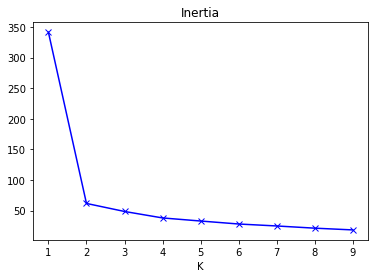

In [50]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia");

In [51]:
ssd

[341.335,
 61.70297837617299,
 48.59646690518784,
 38.02198544698544,
 32.988652113652115,
 28.11730196886447,
 24.909895833333334,
 21.319334156534957,
 18.462257375776396]

In [52]:
from yellowbrick.cluster import KElbowVisualizer

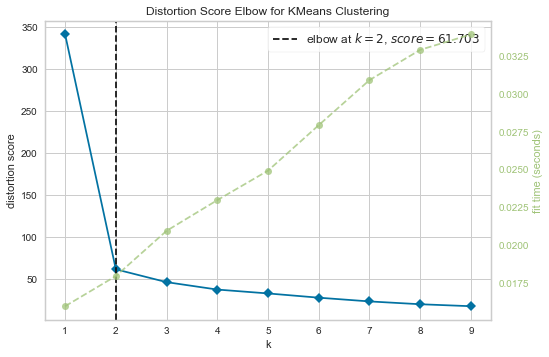

In [55]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df2)
visu.poof();

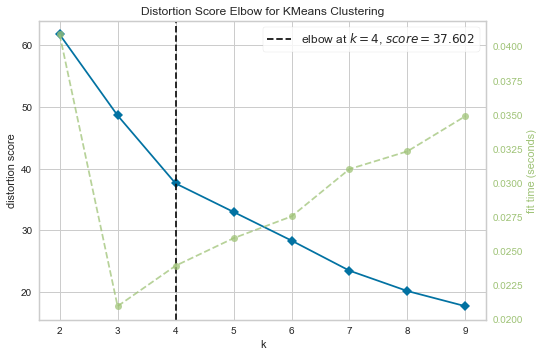

In [56]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.poof();

The results say that (when the k-search range is between 2 and 10), there are actually 4 clusters; although there are 2 parties and 2 independent senators. Probably, some senators do not always like taking orders while voting. Increasing the k size may give us a feeling about the sub-divisions in the parties (or in just one party). 

**Increase k to 4 in order to see if there are sub-parties**

In [124]:
kmeans_4 = KMeans(n_clusters = 4).fit(df2)

In [125]:
labels_4 = kmeans_4.labels_

In [126]:
df2['cluster_4'] = labels_4

In [127]:
df2.head()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,cluster_4
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2


In [134]:
df2.cluster_4.value_counts()

1    52
0    32
3     8
2     8
Name: cluster_4, dtype: int64

That is an interesting result. It looks like there are sub-parties/groups.

In [136]:
tab = pd.crosstab(cluster_4, df["party"])
tab

NameError: name 'cluster_4' is not defined

In [107]:
tab_4 = pd.crosstab(clusters, df2["party"])
tab_4

KeyError: 'party'

**Increase k to 6 in order to see if there are sub-parties**

In [71]:
kmeans_6 = KMeans(n_clusters = 6).fit(df2)

In [72]:
labels_6 = kmeans_6.labels_

In [73]:
df2['cluster_6'] = labels_6

In [74]:
df2.head()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,predicted_clusters,cluster_id,cluster_6
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,2,5
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,1,1
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,3,2


In [75]:
df2.cluster_6.value_counts()

0    47
1    37
2     6
4     5
3     3
5     2
Name: cluster_6, dtype: int64

In [78]:
tab_6 = pd.crosstab(clusters, df2["cluster_6"])
tab_6

cluster_6,0,1,2,3,4,5
row_0,,,,,,
0,47,0,0,3,5,2
1,0,37,6,0,0,0


OK. This is the point to stop increasing the number of clusters. k=4 looks like a reasonable result.

**Silhoutte Score**

In [79]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [104]:
print(f'Silhouette Score(n=2): {silhouette_score(df2, labels)}')

Silhouette Score(n=2): 0.7303344476452661


In [106]:
print(f'Silhouette Score(n=4): {silhouette_score(df2, labels_4)}')

Silhouette Score(n=4): 0.8217108978587662


0.72 is a very nice Silhoutte score; which may be commented as; clusters are quite dense and separated.

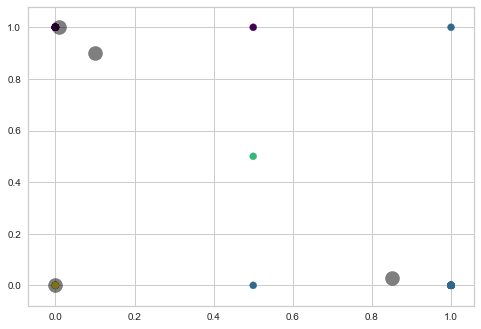

In [81]:
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

**ARI Score**

A domain expert can make comments on the relationship between voting to various bills and his/her party, so I will skip the ARI. 

**K-Means Clustering - Scaled**

In [82]:
df.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,predicted_clusters
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [83]:
df3 = df.drop(['name', 'party', 'state', 'predicted_clusters'], axis=1)

In [84]:
df3.head()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
df3.shape

(100, 15)

In [86]:
hopkins(scale(df3), df3.shape[0])  

0.13179016969095544

In [89]:
k_means_s = KMeans(n_clusters = 2).fit(scale(df3))

In [91]:
clusters_s = k_means_s.labels_

In [92]:
tab = pd.crosstab(clusters_s, df["party"])
tab

party,D,I,R
row_0,,,
0,3,0,54
1,41,2,0


We got the same results. Scaling did not cause a huge improvement here.

**Elbow Method for the Scaled Set**

In [93]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df3))
    ssd.append(kmeans.inertia_)

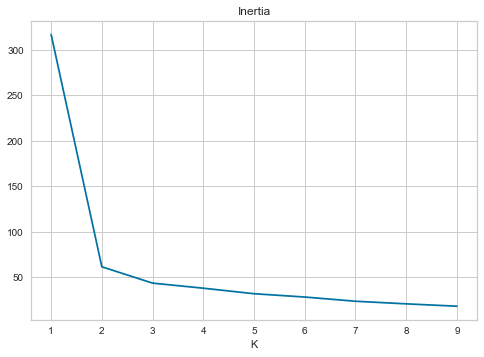

In [94]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia");

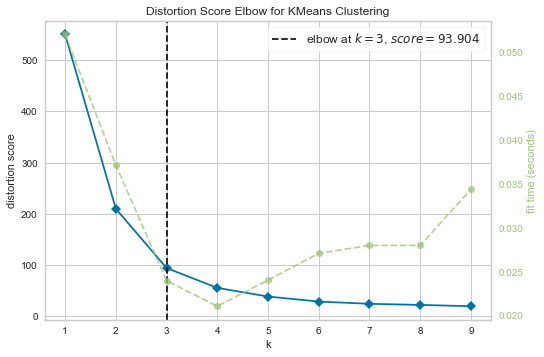

In [95]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df2)
visu.poof();

Yellow brick still says 3 clusters.